env.countstate =  4032
env.currentstate =  []
Episode number 0 completed with reward 0
Average reward after 0 episodes = : -100.0 
time elapsed in seconds =  559.4419470732043
Episode number 1 completed with reward 0
Episode number 2 completed with reward 0
Episode number 3 completed with reward 0
Episode number 4 completed with reward 0
Episode number 5 completed with reward 0
Episode number 6 completed with reward 0
Episode number 7 completed with reward 0
Episode number 8 completed with reward 0
Episode number 9 completed with reward 0
Episode number 10 completed with reward 0
Episode number 11 completed with reward 0
Episode number 12 completed with reward 0
Episode number 13 completed with reward 100
Episode number 14 completed with reward 0
Episode number 15 completed with reward 0
Episode number 16 completed with reward 0
Episode number 17 completed with reward 0
Episode number 18 completed with reward 0
Episode number 19 completed with reward 0
Episode number 20 completed with 

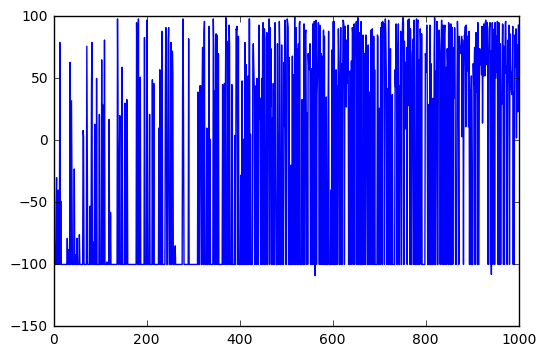

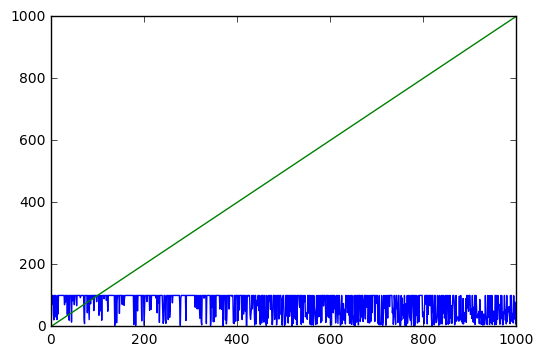

[[-100, 0], [-79, 1], [-100, 2], [-100, 3], [-100, 4], [-49, 5], [-30, 6], [-100, 7], [-100, 8], [-40, 9], [-100, 10], [-63, 11], [-83, 12], [79, 13], [-100, 14], [-49, 15], [-100, 16], [-100, 17], [-100, 18], [-100, 19], [-100, 20], [-100, 21], [-100, 22], [-100, 23], [-100, 24], [-100, 25], [-100, 26], [-100, 27], [-100, 28], [-79, 29], [-100, 30], [-88, 31], [-100, 32], [-100, 33], [-100, 34], [63, 35], [-100, 36], [-100, 37], [32, 38], [-29, 39], [-100, 40], [-100, 41], [-100, 42], [-100, 43], [-23, 44], [-100, 45], [-92, 46], [-100, 47], [-100, 48], [-100, 49], [-79, 50], [-100, 51], [-100, 52], [-100, 53], [-100, 54], [-76, 55], [-100, 56], [-100, 57], [-100, 58], [-100, 59], [-100, 60], [-100, 61], [-100, 62], [8, 63], [3, 64], [-100, 65], [-100, 66], [-100, 67], [-100, 68], [-100, 69], [-100, 70], [76, 71], [-18, 72], [-100, 73], [-100, 74], [-100, 75], [-100, 76], [-100, 77], [-53, 78], [-100, 79], [-100, 80], [39, 81], [79, 82], [-100, 83], [-100, 84], [-82, 85], [-100, 86], 

In [12]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pylab as p
from Reinforcement_Gimport SoccerWorld as sc
import time

import logging
from importlib import reload
reload(logging)
LOG_FILENAME = r'soccer.log'


logging.basicConfig(filename=LOG_FILENAME ,level=logging.DEBUG)

logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')


env = sc.Soccerworld()

#env = gym.make('FrozenLake-v0')

print ("env.countstate = ", env.countstate)
print ("env.currentstate = ", env.currentstate)


observations = env.countstate
actions = 4

tf.reset_default_graph()



#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,observations],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([observations,actions],0,0.01),name = 'W')
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,actions],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

init = tf.global_variables_initializer()

saver = tf.train.Saver([W])

# Set learning parameters
y = .99
e = 0.3
num_episodes = 1000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
rList1 = []
rGoalList = []
with tf.Session() as sess:
    
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        rGoal = 0
        d = False
        j = 0
        #The Q-Network
        while j < 100:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(observations)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.actionspacesample()
            #print("Action Selected = ",a[0])
            #Get new state and reward from environment
            s1,r,d = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(observations)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(observations)[s:s+1],nextQ:targetQ})
            rAll += r
            if r>0:
                rGoal += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/75) + 10)
                break

        jList.append([j,i])
        rList.append(rAll)
        rList1.append([rAll,i])
        rGoalList.append([rGoal,i])

       
        print("Episode number {0} completed with reward {1}".format(i, rGoal))

        if i%100 == 0:
            print("Average reward after {0} episodes = : {1} ".format(i, str(sum(rList) / (i + 1))))
            print("time elapsed in seconds = ", time.clock())
    
    ##save_path = saver.save(sess,'C:/Users/mmorbiwala/Desktop/HackathonProject/PratikUpdatedFiles/Savemodel/model.ckpt')
#print("The weights for the neural network after episode {0} are: ".format(num_episodes, W1))
#print("Average reward after {0} episodes = : " + str(sum(rList)/num_episodes))




p.plot(rList)
p.show()
p.plot(jList)
p.show()


print(rList1)
print(jList)
print(rGoalList)


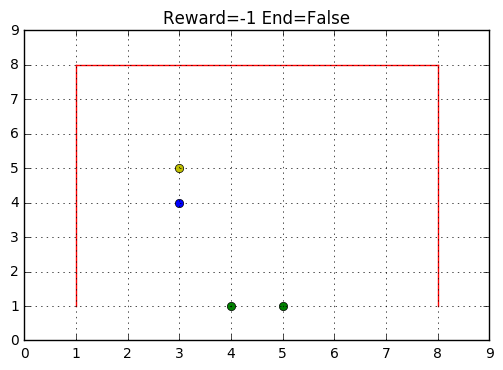

INFO:tensorflow:Restoring parameters from C:/Users/mmorbiwala/Desktop/HackathonProject/PratikUpdatedFiles/Savemodel/model.ckpt


KeyboardInterrupt: 

In [3]:
import tensorflow as tf
import ScoccerWorld as sc
import time
from IPython.display import clear_output
env = sc.Soccerworld()
import numpy as np
observations = env.countstate
actions = 4
e = 0.2

inputs1 = tf.placeholder(shape=[1,observations],dtype=tf.float32)

xa=3
ya=3
xb=4
yb=4

def soccerpredict(xa,ya,xb,yb):
    s = env.getstate(xa,ya,xb,yb)
    with tf.Session() as sess:
        new_saver = tf.train.import_meta_graph('C:/Users/mmorbiwala/Desktop/HackathonProject/PratikUpdatedFiles/Savemodel/model.ckpt.meta')
        new_saver.restore(sess, tf.train.latest_checkpoint('C:/Users/mmorbiwala/Desktop/HackathonProject/PratikUpdatedFiles/Savemodel/'))
        graph = tf.get_default_graph()
        W = graph.get_tensor_by_name("W:0")
        Qout = tf.matmul(inputs1,W)
        predict = tf.argmax(Qout,1)
        a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(observations)[s:s+1]})
        return a[0]


    
def soccerpredictwiths(s):
    with tf.Session() as sess:
        new_saver = tf.train.import_meta_graph('C:/Users/mmorbiwala/Desktop/HackathonProject/PratikUpdatedFiles/Savemodel/model.ckpt.meta')
        new_saver.restore(sess, tf.train.latest_checkpoint('C:/Users/mmorbiwala/Desktop/HackathonProject/PratikUpdatedFiles/Savemodel/'))
        graph = tf.get_default_graph()
        W = graph.get_tensor_by_name("W:0")
        Qout = tf.matmul(inputs1,W)
        predict = tf.argmax(Qout,1)
        a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(observations)[s:s+1]})
        return a[0]


s = env.reset()
d=False


while True:
    s = env.reset()
    d=False    
    
    while True:
        a = soccerpredictwiths(s)
        clear_output()
        s,r,d = env.step(a)        
        
        
        env.render()    
        if d == True:
            break
    
    
    
